In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from math import sqrt

In [3]:
b0 = 26.07
b1 = -0.04
rs = 0.926
se = 0.2417

b0 + b1*110

21.67

# just checking
1. This point has an important residual and low influence.
2. This point has an important leverage but low influence. The linear model is already in its direction.
3. This point has a great leverage and will be influencial to the slope. Without it, the slope will be positive.

4. I would try to square both variables. It is one floor up and the Tuckey circle suggest to go up for both variables.
5. No transformation, it seems to be fit for linear regression.
6. squared the y and square inversed the x

In [4]:
df = pd.read_csv('./Ch8/Dirt_bikes_2014.txt', sep='\t')
df.columns

Index(['Year', 'Manufacturer', 'Model', 'MSRP', 'Displacement', 'Engine Type',
       'Cooling', 'Fuel System', 'Ignition', 'Starting System', 'Transmission',
       'Wheel Base', 'Seat Height', 'Front Suspension', 'Rear Suspension',
       'Front Brake', 'Rear Brake', 'Front Tire', 'Rear Tire', 'Fuel Capacity',
       'Dry Weight', 'Bore', 'Stroke', 'Ratio', 'Weight', 'Rake', 'Trail',
       'Tank', 'Air-Cooled', 'Engine cooling'],
      dtype='object')

In [30]:
df['Air-Cooled'].unique()

array(['Liquid', 'Air', nan], dtype=object)

(array([[15.25671552]]), array([2856.8362457]))

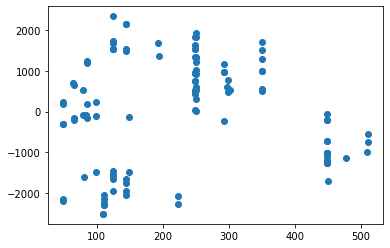

In [22]:
reg = linear_model.LinearRegression()
x = np.array(df.Displacement).reshape(-1, 1)
y = np.array(df.MSRP).reshape(-1, 1)

reg.fit(x, y)
pred = reg.predict(x)
residuals = y - pred
plt.scatter(x, residuals)
reg.coef_, reg.intercept_,

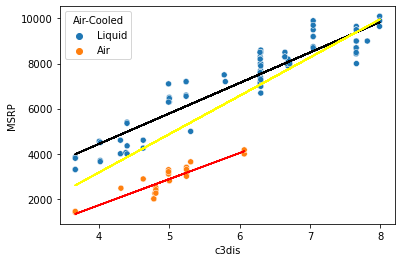

In [64]:
df = pd.read_csv('./Ch8/Dirt_bikes_2014.txt', sep='\t')
df.dropna

reg = linear_model.LinearRegression()
reg1 = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

df1 = df[df['Air-Cooled'] == 'Air']
df2 = df[df['Air-Cooled'] == 'Liquid']

x = np.cbrt(np.array(df.Displacement).reshape(-1, 1))
y = np.array(df.MSRP).reshape(-1, 1)

x1 = np.cbrt(np.array(df1.Displacement).reshape(-1, 1))
y1 = np.array(df1.MSRP).reshape(-1, 1)

x2 = np.cbrt(np.array(df2.Displacement).reshape(-1, 1))
y2 = np.array(df2.MSRP).reshape(-1, 1)

reg.fit(x, y)
reg1.fit(x1, y1)
reg2.fit(x2, y2)

import seaborn as sns
df['c3dis'] = np.cbrt(df.Displacement)
sns.scatterplot(data = df, x='c3dis', y='MSRP', hue='Air-Cooled')

plt.plot(x1, reg1.coef_[[0]]*x1 + reg1.intercept_[0], 'red')
plt.plot(x2, reg2.coef_[[0]]*x2 + reg2.intercept_[0], 'black')
plt.plot(x, reg.coef_[[0]]*x + reg.intercept_[0], 'yellow')


In [12]:
df = pd.read_csv('./Ch8/Fuel_efficiency.txt',
                 sep='\t',
                usecols=['Weight', 'City Mpg'],
                )
df = df[df['City Mpg'] < 40]

<AxesSubplot:xlabel='Weight', ylabel='City Mpg'>

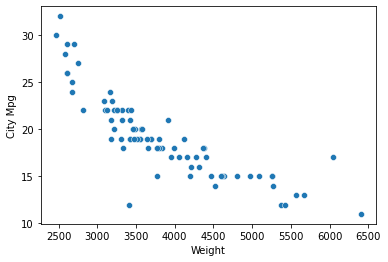

In [13]:
sns.scatterplot(data=df, x='Weight', y='City Mpg')

In [14]:
df['GPM'] =1/df['City Mpg']

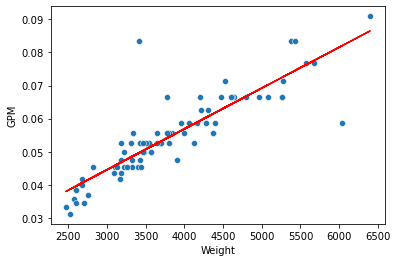

In [45]:
reg = linear_model.LinearRegression()
x = np.array(df['Weight']).reshape(-1, 1)
reg.fit(x, np.array(df['GPM']).reshape(-1, 1))
b0 = reg.intercept_[0]
b1 = reg.coef_[0][0]
sns.scatterplot(data=df, x='Weight', y='GPM')
plt.plot(df.Weight, b0+b1*df.Weight, 'red')
plt.show()

1.2329190930225076e-05

In [99]:
df = pd.read_csv('./Ch8/Penguins.txt', sep='\t')
df.columns

Index(['Dive Heart Rate', 'Depth(m)', 'Duration(min)', 'Bird#'], dtype='object')

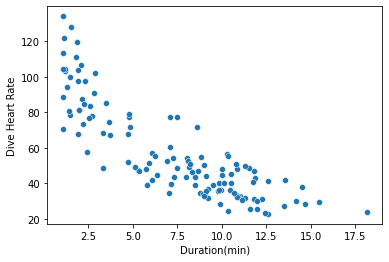

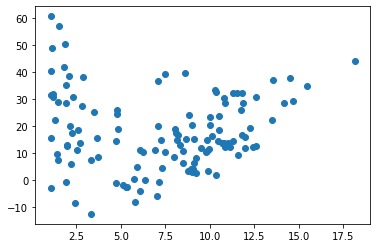

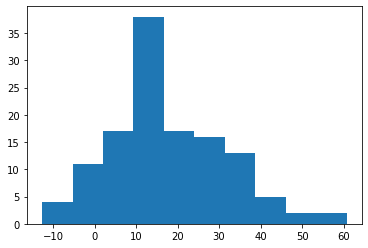

In [100]:
x = df['Duration(min)']
y = df['Dive Heart Rate']
sns.scatterplot(data=df, x='Duration(min)', y='Dive Heart Rate')
plt.show()
b1 = x.corr(y)*y.std()/x.std()
b0 = y.mean() - b1*x.std()
pred = b0 + b1*x
residuals = y - pred
plt.scatter(x, residuals)
plt.show()
plt.hist(residuals)
plt.show()

We can try to take the inverse of both variables. The Tuckey circle suggest to go down for both and I know that ratio benefits from reexpression.

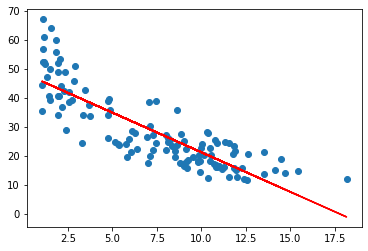

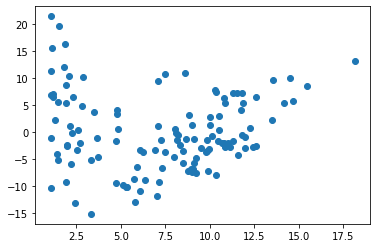

(array([ 4., 11., 17., 38., 17., 16., 13.,  5.,  2.,  2.]),
 array([-15.17879812, -11.50983275,  -7.84086739,  -4.17190202,
         -0.50293665,   3.16602871,   6.83499408,  10.50395945,
         14.17292482,  17.84189018,  21.51085555]),
 <BarContainer object of 10 artists>)

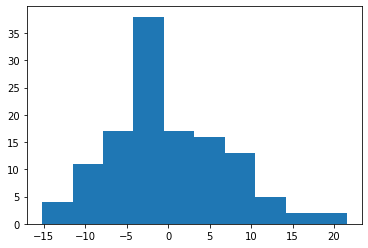

In [74]:
x_r = x
y_r = y*(1/2)

b1 = x_r.corr(y_r)*y_r.std()/x_r.std()
b0 = y_r.mean() - b1*x_r.mean()
pred = b0 + b1*x_r
residuals = y_r - pred

plt.scatter(x_r, y_r)
plt.plot(x_r, b0+b1*x_r, 'red')
plt.show()

plt.scatter(x_r, residuals)
plt.show()
plt.hist(residuals)
plt.show()


r=-0.87
b0=2.01
b=-0.04



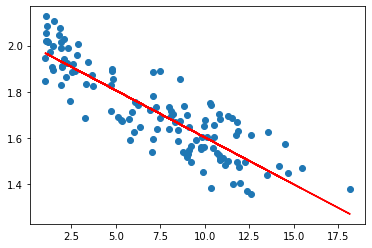

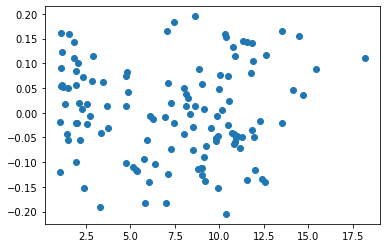

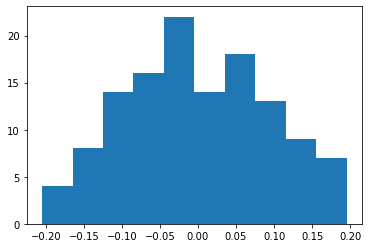

In [84]:
x_r = x
y_r = np.log10(y)

b1 = x_r.corr(y_r)*y_r.std()/x_r.std()
b0 = y_r.mean() - b1*x_r.mean()
pred = b0 + b1*x_r
residuals = y_r - pred

print(f'''
r={x_r.corr(y_r):.2f}
b0={b0:.2f}
b={b1:.2f}
''')

plt.scatter(x_r, y_r)
plt.plot(x_r, b0+b1*x_r, 'red')
plt.show()

plt.scatter(x_r, residuals)
plt.show()
plt.hist(residuals)
plt.show()



r=-0.86
b0=-0.09555
b1=-0.0064192



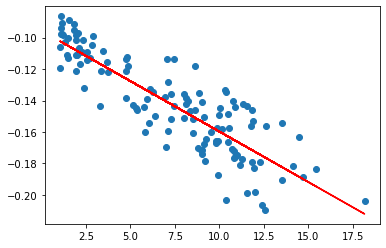

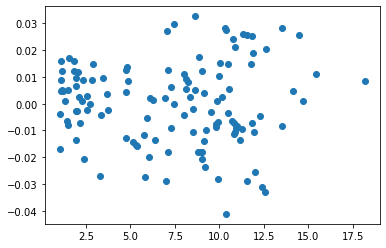

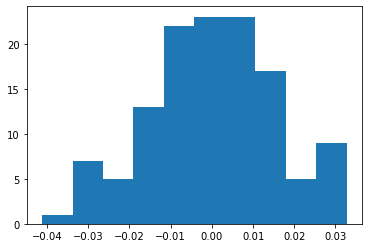

In [107]:
x_r = x
y_r = -1/y**(1/2)

b1 = x_r.corr(y_r)*y_r.std()/x_r.std()
b0 = y_r.mean() - b1*x_r.mean()
pred = b0 + b1*x_r
residuals = y_r - pred

print(f'''
r={x_r.corr(y_r):.2f}
b0={b0:.5f}
b1={b1:.5}
''')

plt.scatter(x_r, y_r)
plt.plot(x_r, b0+b1*x_r, 'red')
plt.show()

plt.scatter(x_r, residuals)
plt.show()
plt.hist(residuals)
plt.show()

In [106]:
pred = b0+b1*10
(-1/pred)**2

39.19022600113004

# Exercice 1
The model seems to be influenced by the segment represented by the brown dot. More over, the red squares and triangles are concentrated in the lower left part of the graph. Their relation might not be represented correctly by the model.

# Exercice 3
Her concerns were justified. The green lines is negative whereas the first model had a positive slope. The orange is almost flat and none of the other has the same slope.

We also know that a model should be apply for the same population. The analyst had reason to believe that there were 5 populations and the regressions she did on those 5 segments confirms her intuition.

# Exercice 5
The friend does an extrapolation that is far away from the x mean(which is its age and year). This prediction tend to have a bigger residual and sometimes, there are just completely wrong because we cannot know for sure what is going to happen.

In [2]:
# Exercice 7
def model(x):
    return -14228 + 36.87*x

model(10000)

354472.0

We should first plot a scatter to study the linear regression conditions. Then, we should note that a linear association is not a causation and doing something will not automatically has the consequences we would expect because of the model.

# Exercice 9
The r square had change dramatically. It means that this datum was influncial. It is confirm by the change in intercept and slope.

# Exercice 11
Correlation does not mean causation. There is maybe a lurking variable that explain the the number of skinned knees on playgrounds. Kids spend less time in the winter because of the wethear for example.

# Exercice 13
Working with summary statistics is different than working with data. Summary statistics tend to vary less. If we have original data, it is closer to the phenomenon we want to study. The closer the better.

# Exercice 15
a. The points are evenly spread, the model is good.
b. The graph shows an upward curvature. Data should be reexpressed.
c. The model is not evenly spread. It thinckens on the left. We should reexpressed.

# Exercice 17
In the regular graph, we note that the distribution for both variables tend to be skewed to the right. There is more data on top of the boxplot than in the bottom. We use reexpression to balance out the distribution to make it more symetric.

At the same time, we improve the proximity between medians and variance.

# Exercice 19
Log seems to be better at evenly spread the distribution.

# exercice 21
We have two patterns. The first one between 1880 and 1940. It seems to decrease slightly. Then, after 1940, after a brutal decrease, the age of mariage for women increases strongly.

b. The association is strong between 1980 and 2020. Otherwise, it is weak.

c. Again, before 1980, no, but after, certainly.

d. A linear model would be appropriate for the data before 1940 and after 1980. We would need two different ones.

# exercice 23
There is a relation. It is not linear but the HDI seems to rapidly grow with a bit of GNI/capita growth.

1. A linear is not good because the graph is not straight.
2. It would have a curvture. I think the curvature would get stronger as the GNI grow. Since the distribution on the scatter plot seem to be straighter on the first quarter, the rest of the prediction my have a bigger negative residuals. Ao the curve might be downward.

In [5]:
df = pd.read_csv('./Ch8/HDI_2018.txt', sep='\t')
df.columns

Index(['Country', 'HDI 2018', 'Life Exp at Birth', 'Old Age Ratio',
       'Percentage Old', 'Mean Yrs Schooling', 'Poverty Index', 'GNI/cap',
       'LogG/c'],
      dtype='object')

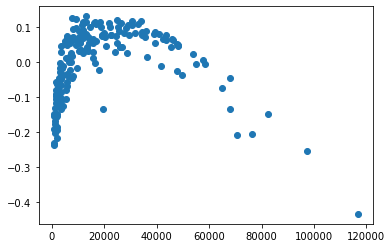

In [7]:
x = df['GNI/cap']
y = df['HDI 2018']

b1 = x.corr(y)*y.std()/x.std()
b0 = y.mean() - b1*x.mean()

prediction = b0 + b1*x
residuals = y - prediction
plt.scatter(x, residuals)

# Exercice 25
It is not. The r squared is an indicator of the variability accounted by one variable. It does not say if the model is justify in the first place. We need a graph for that and check residuals vs predictor plot too.

It may or it may not. We need to check the conditions for linear regression.

# exercice 27
1. it is budget per run times, million dollars per minutes.
2. They have a similar slope. The increase is mostly the same.
3. They just have a different intercept. Herem it means that on average, drama are cheaper to make than the other genre.

# Exercice 29
1. From 1990 to 2008, the association between year and passengers is positive, mostly straight and strong. it is negative for a very short time and the slope is sharp. Then the same patter is starting again but the intercept is lower.
2. The linear regression we could use between 1990 and 2009 was pretty good for the data. The fall in 2009 changes the intercept for sure. The prediction will be different if nothing change.
3. No, we never know what can happen. we can make some prediction in the short term. But extrapolation far from the year mean are not reliable.

# Exercice 31
In what way is the point unusual? Does it have high leverage, a large residual, or both?
Do you think that point is an influential point?
If that point were removed, would the correlation become stronger or weaker? Explain.
If that point were removed, would the slope of the regression line increase or decrease? Explain

1. The point far on the right has a high leverage. It does not seem to be influencial, the linear model would go in the same direction anyways. The correlation would not change because it seems to follow the same trend that the rest of the data.
2. This point has a high leverage. It is mostlikely to be influencial because the trend for the rest of the points seems to have another direction. The correlation and the slope would be change for sure. The rest of the data seems to have a flat slope.
3. This point has a high residual. It might influence the slope and the correlation because it is far from a linear model that would fit the rest of the points. It will change

# Exercice 33
a. E 0.75

b. D 0.05

c. c 0.00

d. B -0.4

e.  a -0.9

# exercice 35
A higher body fat can be associated with lower physical activity which is positively asssociated with blood pressure.

A higher body fat can be associated with lack of sleep which is associated with blood pressure.

A higher body fat can be associated with 

# Exercice 37
1. The school principle uses a summary statistic to build the graph. It tends to show less variability. We don't really know how wide is the spread. On average it seems to be good.
2. 0.8
3. The correlation would be less because of variability with raw data.
4. 1 meaning that everybody will be at grade level in readings. Everything above that demonstrate a sucess.

# Exercice 39
1. The model estimate, on average, that the cost will decrease by 2.13 dollars for each degree f
2. If the temperature is 0 degree F, the cost will be 133 dollars.
3. Around freezing temperature, the residual plot shows that the model tend to over estimates the cost. On the graphm between 10 and 30, the residuals are mostly negative meaning that the prediction is higher than the actual cost.
4. 111.7
5. The residual is about -5 which means that the actual cost 106 dollars.
6. The residuals plot show a downward curvature indicating that the model is not fit for the data.
7. It would be the same, we subtract and multipy which does not change anything for the sd and correlation.

In [2]:
def model(x):
    return 133 - 2.13*x

model(10)

111.7

In [23]:
# Exercice 41
df = pd.read_csv('./Ch8/TBill_rates_2020.txt', sep='\t')

In [25]:
x = df.Year - 1950
y = df['Avg Rate']
r = x.corr(y)
b1 = r*(y.std()/x.std())
b0 = y.mean() - b1*x.mean()
b0+b1*80, r, b0, b1

(4.596452662146728,
 0.17887593103107682,
 2.838076924011567,
 0.021979696726689507)

# answers
1. 0.18
2. The slope is positive, the rate increases with the year by around 1. In 1950, the rate was about 0.
3. Rate at 2.6%
4. No because were are far from x mean.

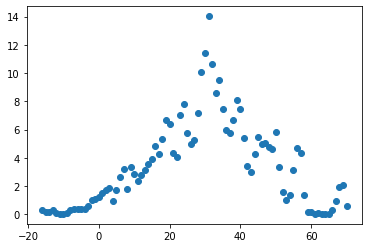

In [26]:
# Exercice 43
plt.scatter(x, y)

1. In this model, the rate at which bond rate increase is negative. It means that, as the years go by, the rate got lower on average. The intercept is higher, but it was because, on the precedent trend, the rate was increasing. It just start where the precedent ended.
3. This prediction is closer to the mean than the other one. But Were are still far from the mean. It is better than the other one but not reliable.
4. I would not because 2030 is to far from both x mean to be reliable. Also, 10 years is a lot and things can happend fast. We learned the hard way in 2008 how the housing market was not as reliable as it was thought. A lot can happend.

In [4]:
b0 = 16.6154
b1 = -0.2505

def model(x: float) -> float:
    return b0 + b1*x

model(80)

-3.424599999999998

# Exercice 45
1. Humans are an influencial outliers. It is far on the x axis with a high leverage. Removing them would change the correlation for sure. It would be much stronger. THe scatter plot shows a somewhat straight relationship.
2. Human have increased their life expectancy with technology and knowledge. We live longer than we used to be. Our life expectancy is not comparable to the regular mamal's life expectancy.
3. THe association is positive and modeterately strong.
4. For each year of life expectancy, the gestation increases by 15.4980 days on average.

In [5]:
-39.5172 + 15.4980*20

270.4428

# Exercice 47
1. Hippos seems to have a high leverage because it is far from the mean. It is influencial because their gestation duration seems to be lower than it would be according to a linear model that would fit he rest of the data. Even if elephants have a high leverage, they seems to be on the same trend than the rest.
2. It would increase without the hippos.
3. I don't think so. We could remove group of animals if we think we should do a linear regression on sub groups. But removing one animal that is not an obvious outlier will just make the model less accurate.
4. Because the slope change a lot, we could think they were influencial. But, it is not actually the case. Elephand might had just offsetting the influence of hyppos. By removing them, the hyppos have a greater influence on the model which change the slop dramaticly.

In [8]:
# Exercice 49
print(16.710 + 0.0708*135)
print(9.901 + 0.1377*135)

26.268
28.490499999999997


1. 26.268 years
2. nothing, it is far from the mean. Extrapolation are most of the time not reliable when they are to far.
3. I have no faith in that model, the residual plot is far from being the evenly spread with no pattern plot it should be. THe linear model is not a good fit.
4. 27.802
5. Again, even if it is closer, it is not reliable because too far from the mean.
6. No because the residual plot is not good enough.

# Exercice 51
1. Both variables are quantitative. The plot is straight. It just thinckens a bit at the beginning. It is also visible on the right part of the residual plot.
2. We can see an outlier with a fertility ratio of 7. It is not very influential because not far from the pattern.
3. It means that 74.2% of the life expectancy is explained by the fertility ration.
4. We don't know if fertility is the cause of life expentency. There might be a lurking variable that explein both variables.

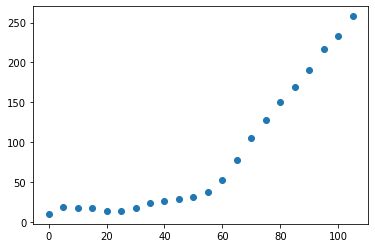

In [14]:
# Exercice 53
df = pd.read_csv('./Ch8/Inflation_2020.txt', sep='\t')
df.columns

x = df.Year - 1915
y = df.JanCPI
plt.scatter(x, y)

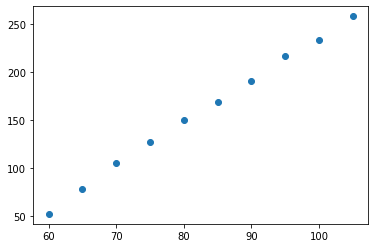

In [27]:
df2 = df[df.Year > 1970]
x = df2.Year - 1915
y = df2.JanCPI
plt.scatter(x, y)

In [28]:
b1= x.corr(y)*y.std()/x.std()
b0 = y.mean() - b1*x.mean()

b0 + b1*(2030-1915)

304.20424242424247

I decided to choose to fit a model with the data between 1960 and 2020. It is the range in which the data respect the linear regression assumption.

In [29]:
b0, b1

(-212.7800000000001, 4.495515151515153)

In [30]:
# Exercice 55
df = pd.read_csv('./Ch8/Oakland_Passengers_2016.txt', sep='\t')
df.columns

Index(['Passengers', 'Year', 'Month', 'Year Numeric', 'Year since 1990', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

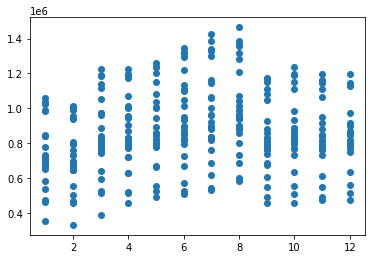

In [31]:
plt.scatter(df.Month, df.Passengers)

In [3]:
# Exercice 5
df = pd.read_csv('./Ch8/Fuel_efficiency.txt', sep='\t')
df.columns

Index(['Model', 'Eng Size', 'Cylinders', 'MSRP', 'City Mpg', 'Highway Mpg',
       'Weight', 'Type', 'Country'],
      dtype='object')

1. The model is better becaue the residual plot appear to be more  evenly speard and straight.
3. For each thousand pounds, the fuel efficacy will increase by 1.77191 on average. At 0, it is 0.624932
4. 

In [13]:
100/(0.624932 + 1.17791*3.5)

21.063198653134826

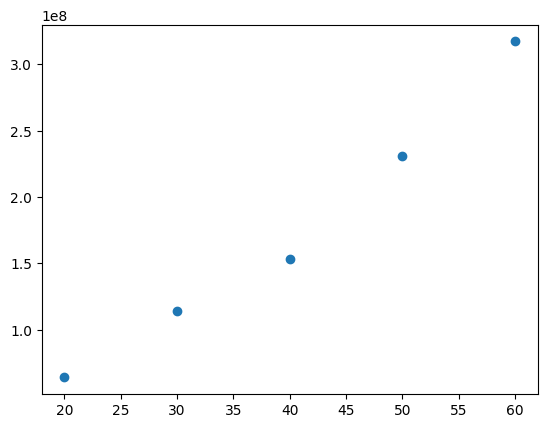

In [58]:
# Exercice 63
x = range(20, 70, 10)
y = np.array([64000000, 114118105, 153171165, 231203238, 317321276])
plt.scatter(x, y)

y_squareroot = y*(1/2)
y_log = np.log10(y)
y_reciprocal_square = -1/(y**(1/2))

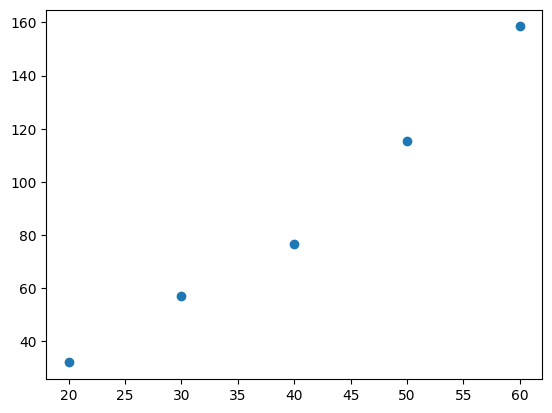

In [37]:
plt.scatter(x, y_squareroot)

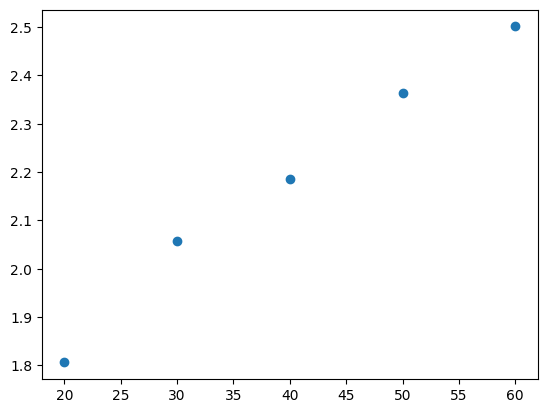

In [40]:
plt.scatter(x, y_log)

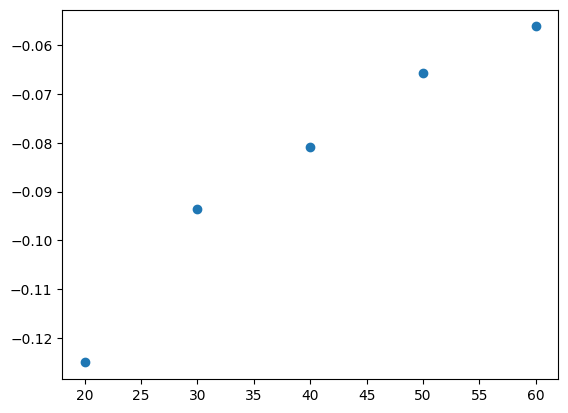

In [42]:
plt.scatter(x, y_reciprocal_square)

In [59]:
y = pd.Series(y_log)
x = pd.Series(x)
b1 = x.corr(y)*y.std()/x.std()
b0 = y.mean() - b1*x.mean()

In [61]:
def model(x):
    pred = b0 + b1*x
    return 10**pred

model(55), model(70)

(273799467.0849562, 492067031.2110105)

In [51]:
y

0    1.806180
1    2.056905
2    2.184691
3    2.363612
4    2.501059
dtype: float64

In [57]:
df.iloc[:,1]

0      64
1      62
2      59
3     114
4     118
5     105
6     153
7     171
8     165
9     231
10    203
11    238
12    317
13    321
14    276
Name: Stopping.Distance, dtype: int64

In [76]:
# Exercice 69
df = pd.read_csv('./Ch8/Planets.txt', sep='\t')
x = df.iloc[:, 2]
y = df.iloc[:, 3]

y_square_root = y**(1/2)
y_log = np.log10(y)
y_square = x**2
y_r = y_square_root

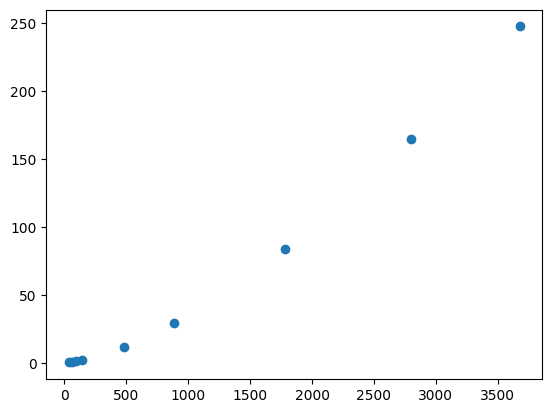

In [68]:
plt.scatter(x, y)

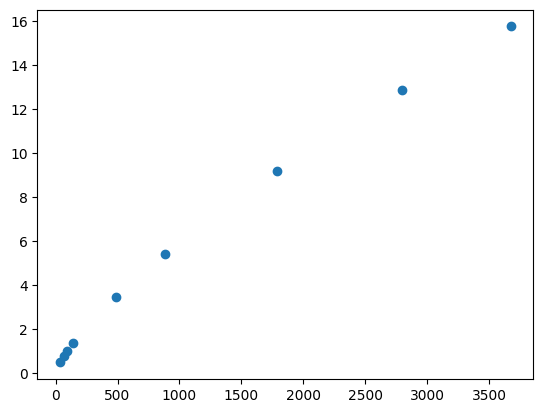

In [72]:
plt.scatter(x, y_square_root)

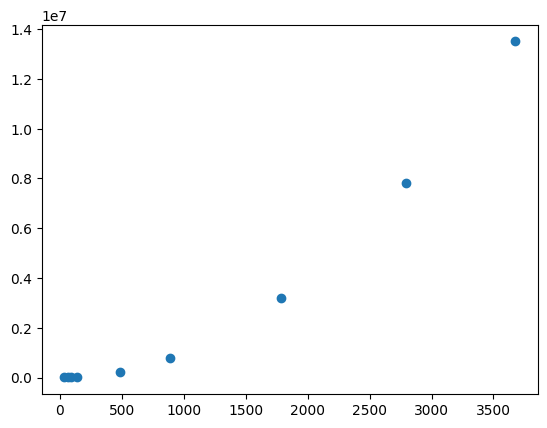

In [75]:
plt.scatter(x, y_square)

In [77]:
df.columns

Index(['Planet', 'Position Number', 'Distance from sun(million miles)',
       'Length of year(earth years)'],
      dtype='object')

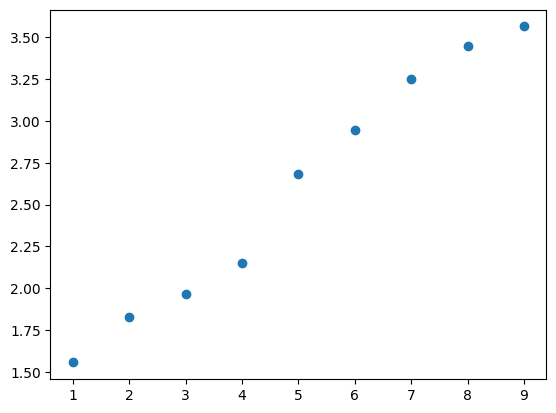

In [80]:
x = df.iloc[:, 1]
y = df.iloc[:, 2]

y_log = np.log10(y)
plt.scatter(x, y_log)

In [82]:
b1 = x.corr(y_log)*y_log.std()/x.std()
b0 = y_log.mean() - b1*x.mean()

In [86]:
10**(b0+b1*9)

4827.957900919902

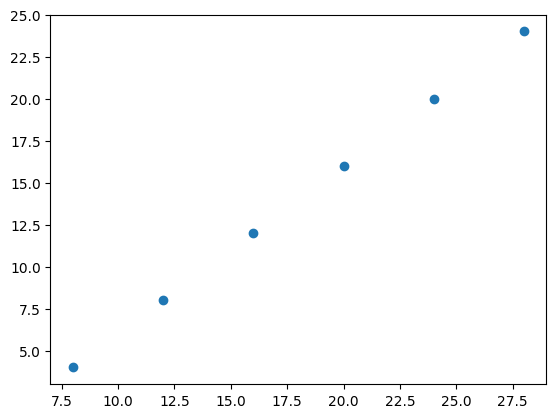

In [103]:
x = pd.Series([8, 12, 16, 20, 24, 28])
y = pd.Series([16, 64, 144, 256, 400, 576])
y_sqr = y**(1/2)
plt.scatter(x, y_sqr)

In [101]:
b1 = x.corr(y_sqr)*y.std()/x.std()
b0 = y_sqr.mean() - b1*x.mean()

def model(x):
    return b0+b1*x

model(10)**2, model(36)**2

(46149.45458141112, 279687.12719182513)

In [104]:
b0, b1

(-500.8545425651794, 28.603030142509965)

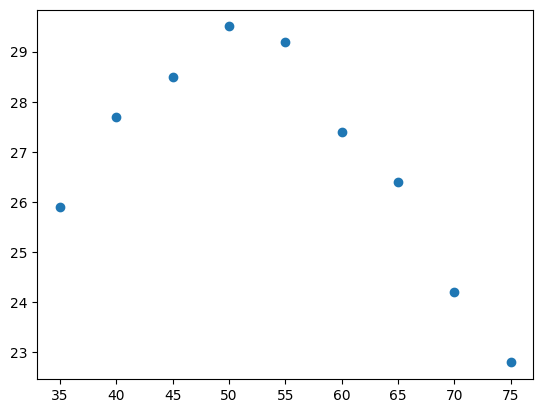

In [19]:
# Exercice 77
x = pd.Series([35, 40, 45, 50, 55, 60, 65, 70, 75])
y = pd.Series([25.9, 27.7, 28.5, 29.5, 29.2, 27.4, 26.4, 24.2, 22.8])

plt.scatter(x, y)

In [20]:
b1 = x.corr(y)*y.std()/x.std()
b0 = y.mean() - b1*x.mean()
print(f'fuel efficiency = {b0:.2f} + {b1:.2f}*speed')

fuel efficiency = 32.20 + -0.10*speed


se= 3.045183153257572e-15
1.8238542826784285
r squared = 0.35



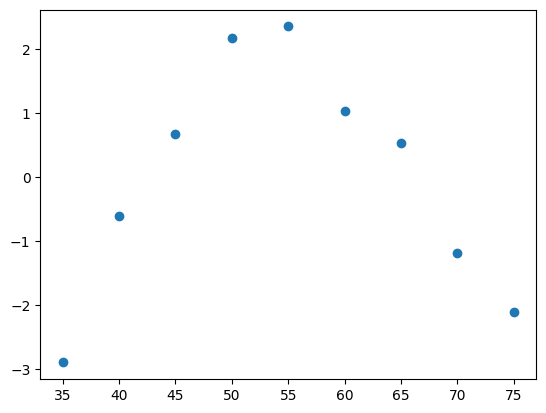

In [24]:
predictions = b0 + b1*x
residuals = y - predictions
se = (residuals.sum()**2)**(1/2)/(len(residuals)-2)
print(f'''se= {se}
{residuals.std()}
r squared = {x.corr(y)**2:.2f}
''')
plt.scatter(x, residuals)

This model is not reliable. The scatter shows no linear relation ship between these two variables. No reexpression make it better. We cannot use this model.

In [26]:
residuals

0   -2.891111
1   -0.604444
2    0.682222
3    2.168889
4    2.355556
5    1.042222
6    0.528889
7   -1.184444
8   -2.097778
dtype: float64

In [35]:
import math

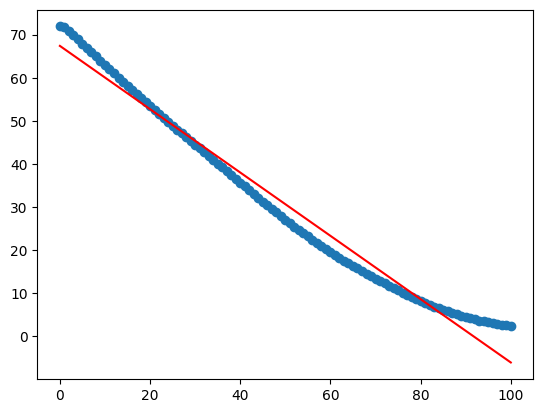

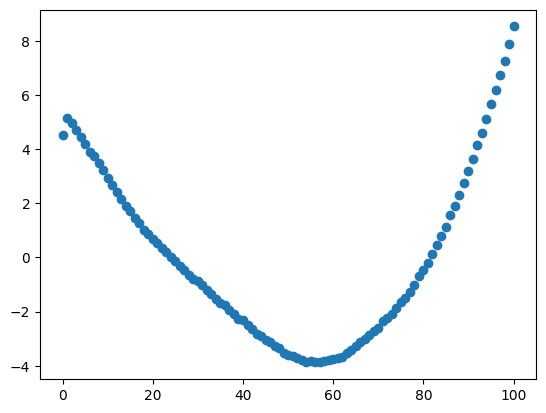

In [38]:
# Exercice 79
df = pd.read_csv('./Ch8/Years_to_live_2017.txt', sep='\t')
x = df.Age
y = df['Life expectancy']

b1 = x.corr(y)*y.std()/x.std()
b0 = y.mean() - b1*x.mean()

predictions = b0 + b1*x
residuals = y - predictions
se = math.sqrt(residuals.sum()**2)/(len(residuals) - 2)

plt.scatter(x, y)
plt.plot(x, b0+b1*x, 'red')
plt.show()
plt.scatter(x, residuals)
plt.show()

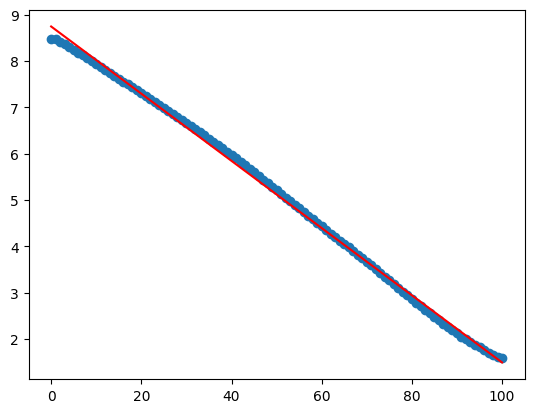

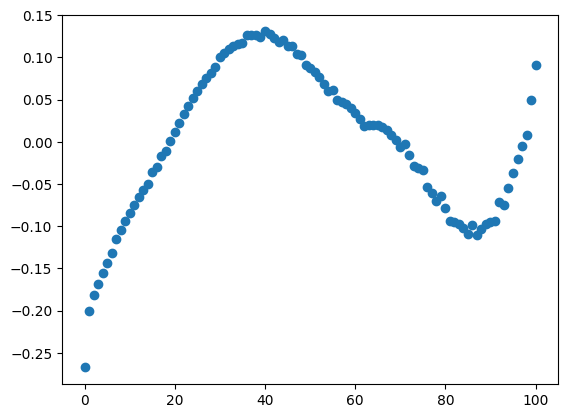


se = 3.319454699889357e-16
r**2 = 0.98



In [45]:
# Exercice 79
df = pd.read_csv('./Ch8/Years_to_live_2017.txt', sep='\t')
x = df.Age
y = df['Life expectancy']
y_r = y**(1/2)

b1 = x.corr(y_r)*y_r.std()/x.std()
b0 = y_r.mean() - b1*x.mean()

predictions = b0 + b1*x
residuals = y_r - predictions
se = math.sqrt(residuals.sum()**2)/(len(residuals) - 2)

plt.scatter(x, y_r)
plt.plot(x, b0+b1*x, 'red')
plt.show()
plt.scatter(x, residuals)
plt.show()
print(f"""
se = {se}
r**2 = {x.corr(y)**2:.2f}
""")

It is not a good fit. First the scatter plot shows some non linear patter at the beginning and the end. Then the residuals graph shows a strong downward curve.